# Import Modules

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler


plt.style.use('seaborn-darkgrid')

In [ ]:
df=pd.read_csv('BTC.csv')
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
2075,23-05-2020,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,24-05-2020,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,25-05-2020,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,26-05-2020,NaN,NaN,NaN,NaN,NaN,NaN
2079,27-05-2020,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


# Data Preprocessing

In [ ]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  2080
Total number of fields present in the dataset:  7


In [ ]:
df.shape


(2080, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2080 non-null   object 
 1   Open       2079 non-null   float64
 2   High       2079 non-null   float64
 3   Low        2079 non-null   float64
 4   Close      2079 non-null   float64
 5   Adj Close  2079 non-null   float64
 6   Volume     2079 non-null   float64
dtypes: float64(6), object(1)
memory usage: 113.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03
mean,4075.111331,4183.711147,3959.022388,4079.070598,4079.070598,7.130432e+09
std,3998.598485,4124.391444,3851.981704,3999.222863,3999.222863,1.133625e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,423.031509,427.498001,418.451492,422.783997,422.783997,5.697515e+07
50%,2732.699951,2838.409912,2670.949951,2744.909912,2744.909912,1.367050e+09
75%,7339.815430,7498.520019,7184.514160,7344.389892,7344.389892,8.924694e+09
max,19475.800780,20089.000000,18974.099610,19497.400390,19497.400390,7.415677e+10


In [ ]:
df = df.dropna()

In [ ]:
print('Null Values:',df.isnull().values.sum())
print('If any NA values:', df.isnull().values.any())

Null Values: 0
If any NA values: False


In [ ]:
# Printing the start date and End date of the dataset

sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 17-09-2014
Ending Date 27-05-2020


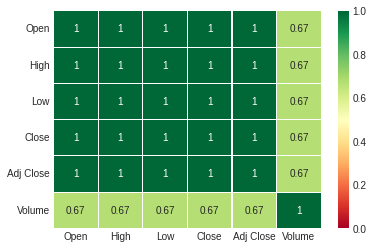

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)
plt.show()

In [ ]:
data_training = df[df['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
14,01-10-2014,387.427002,391.378998,380.779999,383.614990,383.614990,2.622940e+07
...,...,...,...,...,...,...,...
2068,16-05-2020,9333.240234,9564.205078,9260.694336,9377.013672,9377.013672,3.616477e+10
2069,17-05-2020,9374.929688,9823.001953,9349.545898,9670.739258,9670.739258,4.008425e+10
2070,18-05-2020,9675.695313,9906.030273,9570.359375,9726.575195,9726.575195,4.182714e+10
2071,19-05-2020,9727.063477,9836.047852,9539.624023,9729.038086,9729.038086,3.925429e+10


In [ ]:
data_test = df[df['Date']> '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
5,22-09-2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
6,23-09-2014,402.092010,441.557007,396.196991,435.790985,435.790985,4.509950e+07
7,24-09-2014,435.751007,436.112000,421.131989,423.204987,423.204987,3.062770e+07
8,25-09-2014,423.156006,423.519989,409.467987,411.574005,411.574005,2.681440e+07
...,...,...,...,...,...,...,...
2074,22-05-2020,9080.334961,9232.936523,9008.638672,9182.577148,9182.577148,2.981077e+10
2075,23-05-2020,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,24-05-2020,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,25-05-2020,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10


In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
14,387.427002,391.378998,380.779999,383.614990,26229400.0


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        2.04208427e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        3.85277136e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        4.31621846e-04],
       ...,
       [4.92193672e-01, 4.87707807e-01, 4.99869942e-01, 4.94245314e-01,
        5.64001911e-01],
       [4.94855386e-01, 4.84187081e-01, 4.98235308e-01, 4.94372797e-01,
        5.29304390e-01],
       [4.94765517e-01, 4.82614737e-01, 4.93319876e-01, 4.83706952e-01,
        4.92783581e-01]])

In [ ]:
X_train = []
Y_train = []
training_data.shape[0]

1364

In [ ]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape

(1304, 60, 5)

# LSTM-RNN MODEL BUILDING

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
27/27 [==============================] - 12s 228ms/step - loss: 0.0293
Epoch 2/20
27/27 [==============================] - 6s 227ms/step - loss: 0.0083
Epoch 3/20
27/27 [==============================] - 8s 310ms/step - loss: 0.0067
Epoch 4/20
27/27 [==============================] - 6s 229ms/step - loss: 0.0068
Epoch 5/20
27/27 [==============================] - 6s 226ms/step - loss: 0.0054
Epoch 6/20
27/27 [==============================] - 6s 225ms/step - loss: 0.0053
Epoch 7/20
27/27 [==============================] - 6s 227ms/step - loss: 0.0047
Epoch 8/20
27/27 [==============================] - 6s 228ms/step - loss: 0.0046
Epoch 9/20
27/27 [==============================] - 6s 226ms/step - loss: 0.0040
Epoch 10/20
27/27 [==============================] - 6s 224ms/step - loss: 0.0042
Epoch 11/20
27/27 [==============================] - 6s 225ms/step - loss: 0.0050
Epoch 12/20
27/27 [==============================] - 6s 228ms/step - loss: 0.0041
Epoch 13/20
27/27 [=====

In [ ]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,8599.758789,8726.796875,8471.212891,8562.454102,3.534916e+10
1,8563.264648,8921.308594,8532.630859,8869.669922,4.285767e+10
2,8865.387695,8901.598633,8704.990234,8787.786133,4.238672e+10
3,8788.541992,8843.366211,8712.431641,8755.246094,3.474671e+10
4,8760.285156,9142.054688,8757.253906,9078.762695,3.969805e+10


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.4364425 , 0.42838208, 0.44141276, 0.43398841, 0.4766398 ],
       [0.4345515 , 0.43816772, 0.44467922, 0.44989043, 0.57789972],
       [0.45020644, 0.43717613, 0.45384601, 0.44565198, 0.57154836],
       ...,
       [0.46818132, 0.45663583, 0.45822098, 0.44578563, 0.43846949],
       [0.44609842, 0.43966175, 0.45462663, 0.45181931, 0.42187297],
       [0.44858819, 0.43506214, 0.46071565, 0.44922869, 0.39296111]])

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((715, 60, 5), (715,))

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

23/23 [==============================] - 2s 54ms/step


(array([[0.4250886 ],
        [0.42116183],
        [0.4095083 ],
        [0.39054307],
        [0.36616567],
        [0.33858556],
        [0.30980933],
        [0.28120688],
        [0.25382823],
        [0.2283533 ],
        [0.20510353],
        [0.18416716],
        [0.16544455],
        [0.14879568],
        [0.13410246],
        [0.12109222],
        [0.10945202],
        [0.09888618],
        [0.08915682],
        [0.07994739],
        [0.07115204],
        [0.06288829],
        [0.05543993],
        [0.04900029],
        [0.04353796],
        [0.0390142 ],
        [0.03530283],
        [0.03223199],
        [0.02968381],
        [0.02756611],
        [0.02580369],
        [0.02433493],
        [0.02310769],
        [0.02207876],
        [0.02121298],
        [0.02048143],
        [0.01986039],
        [0.01933064],
        [0.01887656],
        [0.01848554],
        [0.0181469 ],
        [0.01785223],
        [0.01759464],
        [0.01736665],
        [0.0171614 ],
        [0

In [ ]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       1.34860207e-11])

In [ ]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [ ]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [ ]:
Y_pred

array([[ 8203.744  ],
       [ 8127.962  ],
       [ 7903.061  ],
       [ 7537.053  ],
       [ 7066.596  ],
       [ 6534.33   ],
       [ 5978.9805 ],
       [ 5426.9844 ],
       [ 4898.6064 ],
       [ 4406.9688 ],
       [ 3958.2734 ],
       [ 3554.2244 ],
       [ 3192.8987 ],
       [ 2871.5935 ],
       [ 2588.0305 ],
       [ 2336.947  ],
       [ 2112.3042 ],
       [ 1908.3949 ],
       [ 1720.6289 ],
       [ 1542.897  ],
       [ 1373.1564 ],
       [ 1213.675  ],
       [ 1069.9299 ],
       [  945.6519 ],
       [  840.23486],
       [  752.93134],
       [  681.3059 ],
       [  622.0422 ],
       [  572.865  ],
       [  531.9956 ],
       [  497.9829 ],
       [  469.63745],
       [  445.95316],
       [  426.09583],
       [  409.38727],
       [  395.26907],
       [  383.28378],
       [  373.06015],
       [  364.29684],
       [  356.7507 ],
       [  350.21527],
       [  344.52844],
       [  339.55725],
       [  335.15735],
       [  331.19614],
       [  

In [ ]:
Y_test

array([  231.18798813,   222.20300313,   225.19500713,   258.85400415,
         246.25900314,   234.53198313,   226.65899713,   222.57400513,
         200.03100611,   199.19101011,   205.52398712,   209.22100812,
         206.06500312,   181.6940001 ,   181.7139891 ,   170.5899971 ,
         177.8800051 ,   176.3179931 ,   180.1919861 ,   158.81201209,
         168.1120001 ,   180.9819951 ,   174.7070011 ,   176.2779851 ,
         190.05099511,   199.98898311,   199.12200911,   193.60501111,
         192.47699011,   199.25500511,   198.61300711,   152.64599609,
         144.17099008,   155.11999509,   157.48800709,   145.38900808,
         142.25500508,   150.68600509,   139.26300108,   140.80398608,
         135.82199108,   134.01699808,    34.48100302,    50.42500303,
          56.61999503,    55.80299403,    70.45500204,    77.18199204,
          96.26998905,    86.45401005,    56.45100403,    55.87500003,
          49.54399103,    66.85499604,    67.64700304,    59.09799203,
      

## Final Plotting

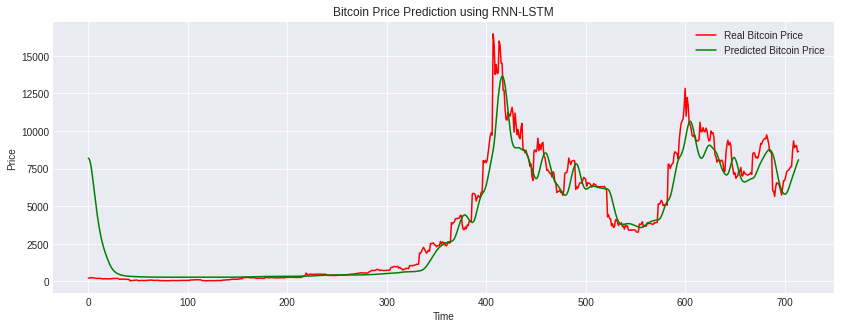

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#The resulting RMSE result is not too high,so the LSTM-RNN model is good for use in this research case. The loss function value of this study is 0.0101.

In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test data MSE: ", mean_squared_error(Y_test,Y_pred))
print("Test data MAE: ", mean_absolute_error(Y_test,Y_pred))

Test data RMSE:  1222.6147761510003
Test data MSE:  1494786.8908627608
Test data MAE:  666.8292276628316
